In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 
data=pd.read_csv("pokemon1.csv")

# Preprocessing

In [2]:
data['type2'].fillna('None', inplace=True) # Replacing the values in type2 with None
data['percentage_male'].fillna('None', inplace=True) # Replacing the values in percentage_male with None
data['height_m'].fillna(data['height_m'].mean(), inplace=True) # Replacing the values in height_m with Mode value of the whole column
data['weight_kg'].fillna(data['weight_kg'].mean(), inplace=True) # Replacing the values in weight_kg with mode value of the whole column
data[data["capture_rate"]== "30 (Meteorite)255 (Core)"][['name','capture_rate','type1','generation','classfication']]
data["capture_rate"].replace({'30 (Meteorite)255 (Core)': '30'}, inplace=True)
data['capture_rate'] = data['capture_rate'].astype('int')
data['capture_rate'].dtype

dtype('int32')

# What is the count of pokemon per generation

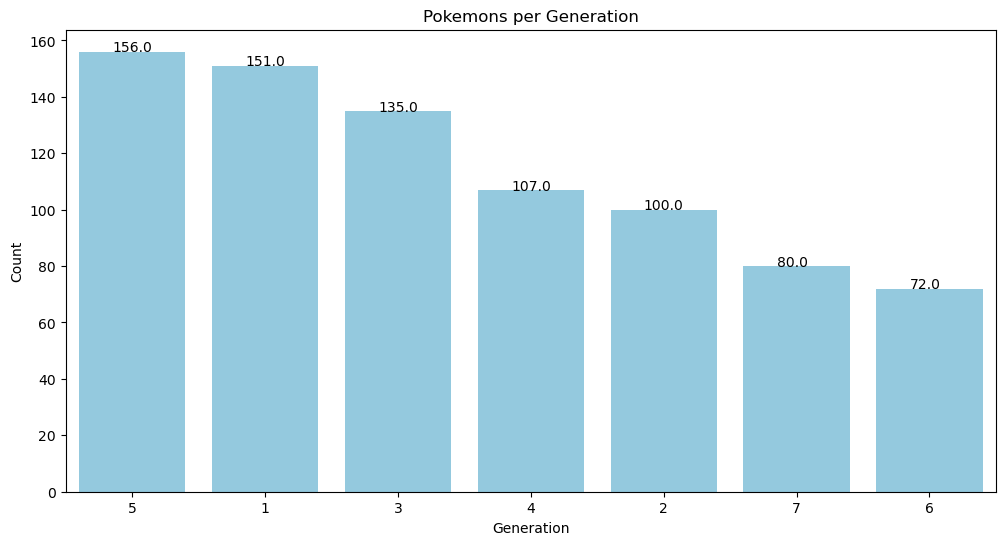

In [29]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='generation',data=data,order=data['generation'].value_counts().index,color='skyblue')
ax.set_title('Pokemons per Generation')
ax.set(xlabel='Generation',ylabel='Count')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

# How many types of pokemon are there in each generation

In [13]:
primary_type_generation_group = data.groupby(['generation', 'type1'])['name'].count().to_frame().reset_index()
primary_type_generation_group.rename(columns={'name' : 'name_count'}, inplace=True)
primary_type_generation_group.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
generation,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2
type1,bug,dragon,electric,fairy,fighting,fire,ghost,grass,ground,ice,normal,poison,psychic,rock,water,bug,dark,electric,fairy,fighting
name_count,12,3,9,2,7,12,3,12,8,2,22,14,8,9,28,10,5,6,5,2


In [27]:
primary_type_generation_dict  = {}
for generation in list(primary_type_generation_group['generation'].unique()):
    current_generation = []
    for p_type in primary_type_generation_group['type1'].unique():
        try:
            current_generation.append(
                primary_type_generation_group.loc[(primary_type_generation_group['generation']==generation) 
                                        & (primary_type_generation_group['type1'] == p_type)]['name_count'].values[0])
        except IndexError:
            current_generation.append(0)
    primary_type_generation_dict[f'generation {generation}'] = current_generation

p_type_by_generation = pd.DataFrame(primary_type_generation_dict, index= primary_type_generation_group['type1'].unique())

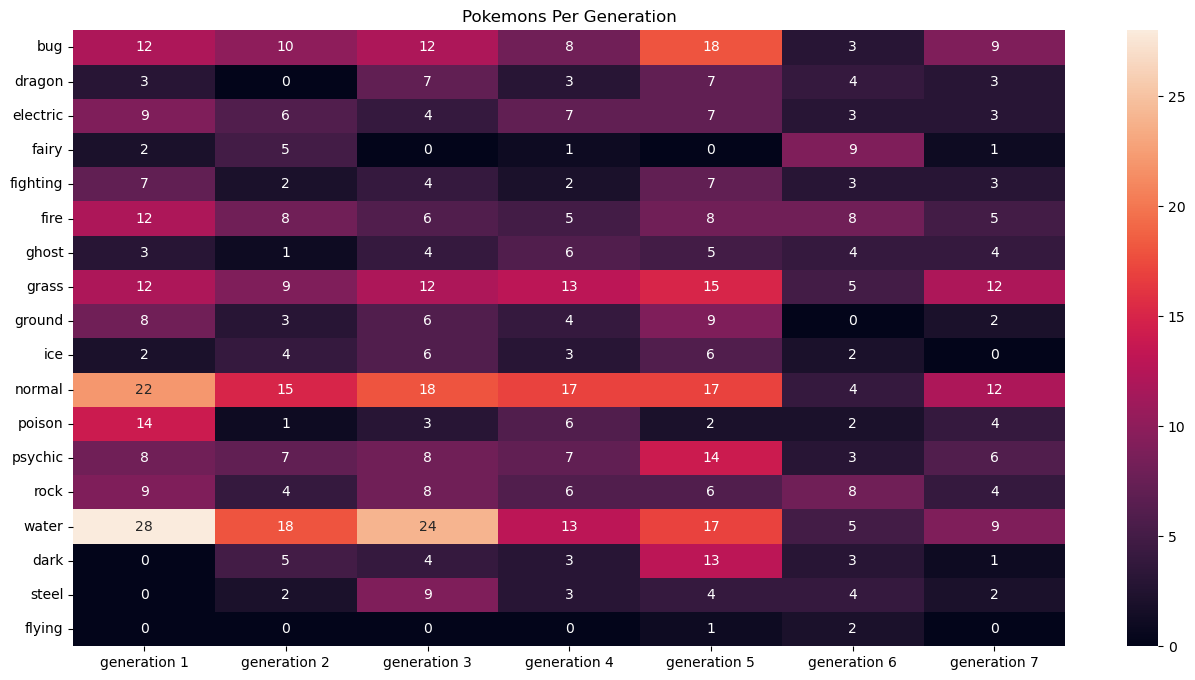

In [28]:
fig,axes = plt.subplots(figsize=(16,8))
sns.heatmap(p_type_by_generation,annot=True).set_title('Pokemons Per Generation')
plt.show()

# Which type has the easiest pokemon to catch

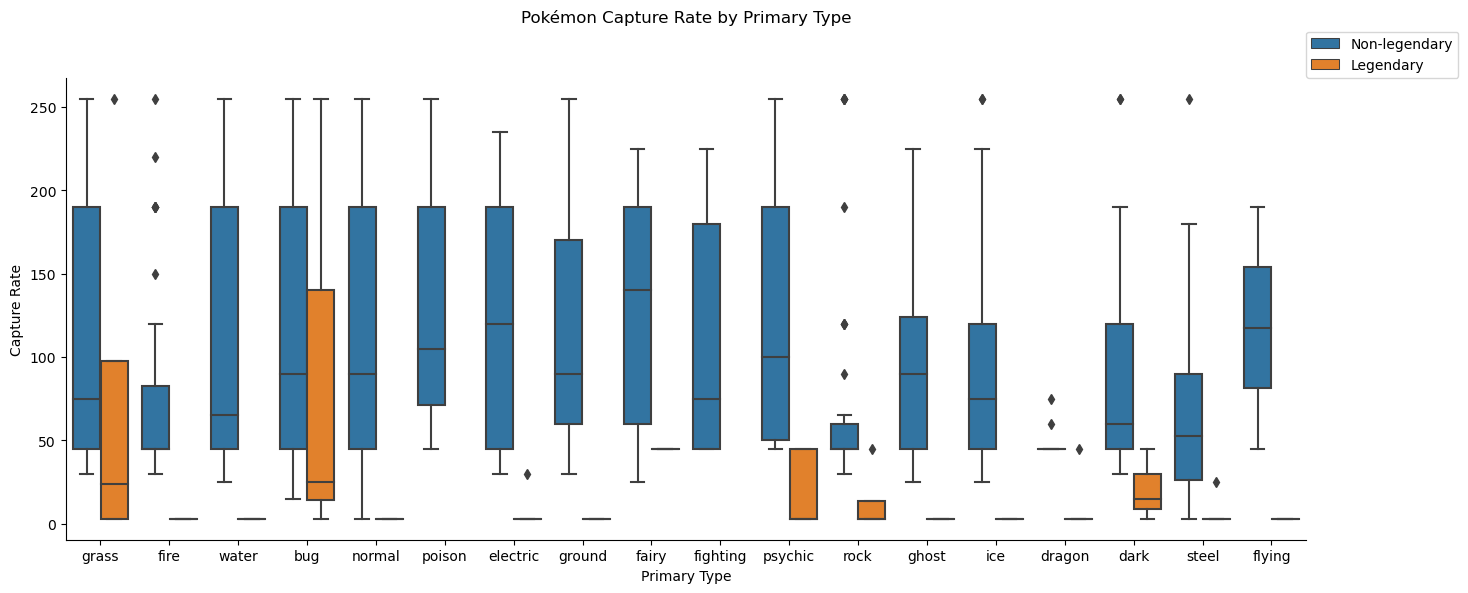

In [14]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(x='type1', y='capture_rate', hue='is_legendary', data = data)

ax.set_xlabel(xlabel='Primary Type')
ax.set_ylabel(ylabel='Capture Rate')
ax.set_title('Pokémon Capture Rate by Primary Type', pad=40)

sns.despine(top=True, right=True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Non-legendary', 'Legendary'], loc=(1,1))

# What are the most widespread types of pokemon in both primary (Type1) and secondary types (Type2)

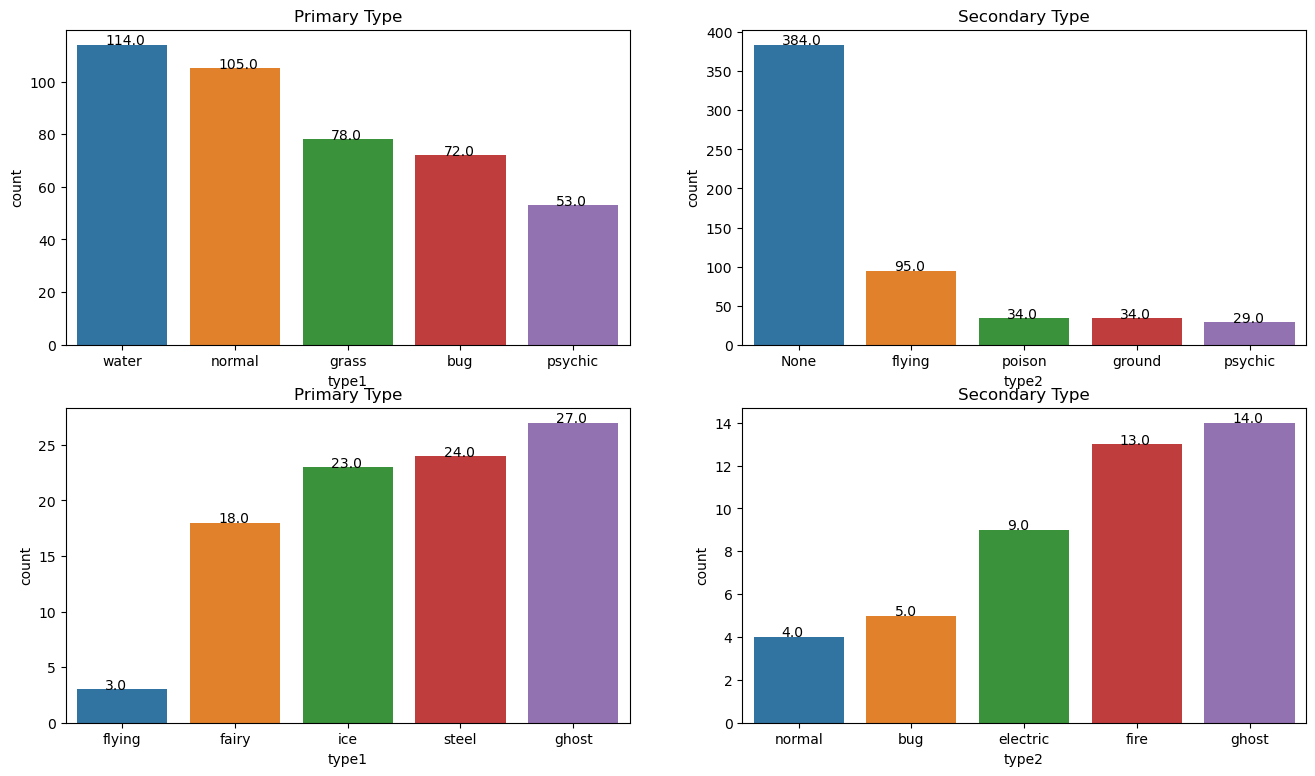

In [15]:
fig,axes = plt.subplots(2,2,figsize=(16,9))
ax = sns.countplot(x='type1',data=data,order=data['type1'].value_counts().iloc[:5].index, ax=axes[0,0])
ax.set_title('Primary Type')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

ax = sns.countplot(x='type2',data=data,order=data['type2'].value_counts().iloc[:5].index, ax=axes[0,1])
ax.set_title('Secondary Type')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

ax = sns.countplot(x='type1',data=data,order=data['type1'].value_counts(ascending=True).index[:5], ax=axes[1,0])
ax.set_title('Primary Type')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

ax = sns.countplot(x='type2',data=data,order=data['type2'].value_counts(ascending=True).index[:5], ax=axes[1,1])
ax.set_title('Secondary Type')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

# Which type is the most likely to be a legendary Pokemon

In [16]:

legend = data[data['is_legendary']==1][['name','type1','type2']]
legend.head()

,name,type1,type2
143,Articuno,ice,flying
144,Zapdos,electric,flying
145,Moltres,fire,flying
149,Mewtwo,psychic,None
150,Mew,psychic,None


In [17]:
from collections import Counter
# i= int(i)
#for secondary
s = []
secondary = legend['type2']
for i in secondary:
    if 'None' in i: 
        pass
    else:
        s.append(i)
count_s = Counter(s)        

# for combined
c=[]
combined = legend['type1']
for i in combined:
    if 'None' in i: 
        pass
    else:
        c.append(i)
count_c = Counter(c)

count_s = sorted(count_s.items(), key=lambda x: x[1],reverse=True)
count_c = sorted(count_c.items(), key=lambda x: x[1],reverse=True)

In [18]:
# separating the key, values we got from Counter() of both count_c(combined) and count_s(secondary).
v_s,k_s=[],[]
v_c,k_c=[],[]
for i in count_s:
    k_s.append(i[0])
    v_s.append(i[1])
for i in count_c:
    k_c.append(i[0])
    v_c.append(i[1])

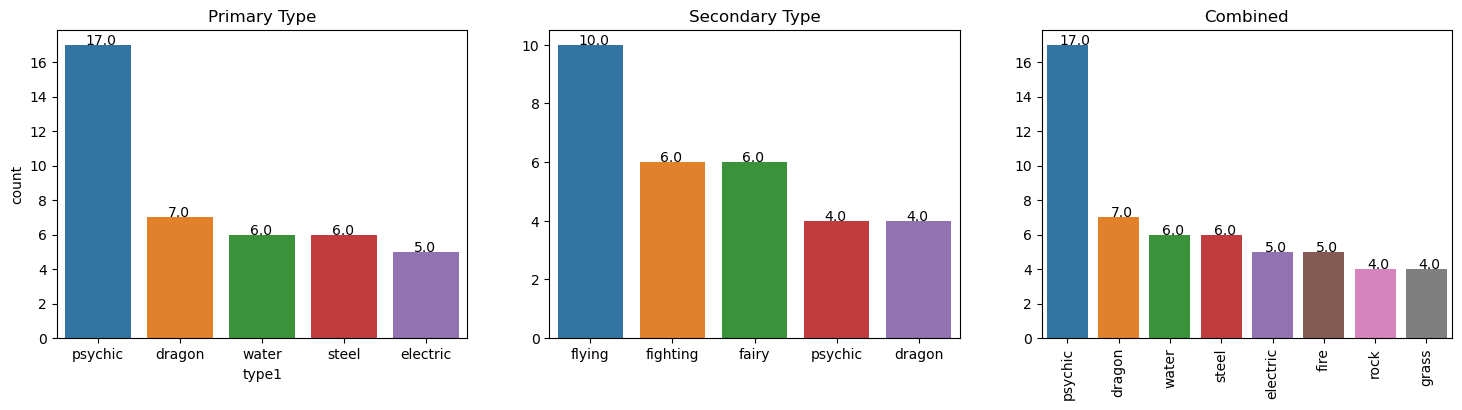

In [19]:
fig,axes = plt.subplots(1,3,figsize=(18,4))
ax = sns.countplot(x='type1',data=legend,order=legend['type1'].value_counts().iloc[:5].index, ax=axes[0])
ax.set_title('Primary Type')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

ax = sns.barplot(x=k_s[:5],y=v_s[:5], ax=axes[1])
ax.set_title('Secondary Type')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    
ax = sns.barplot(x=k_c[:8],y=v_c[:8], ax=axes[2])
ax.set_title('Combined')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

# Can we find the strongest pokemon

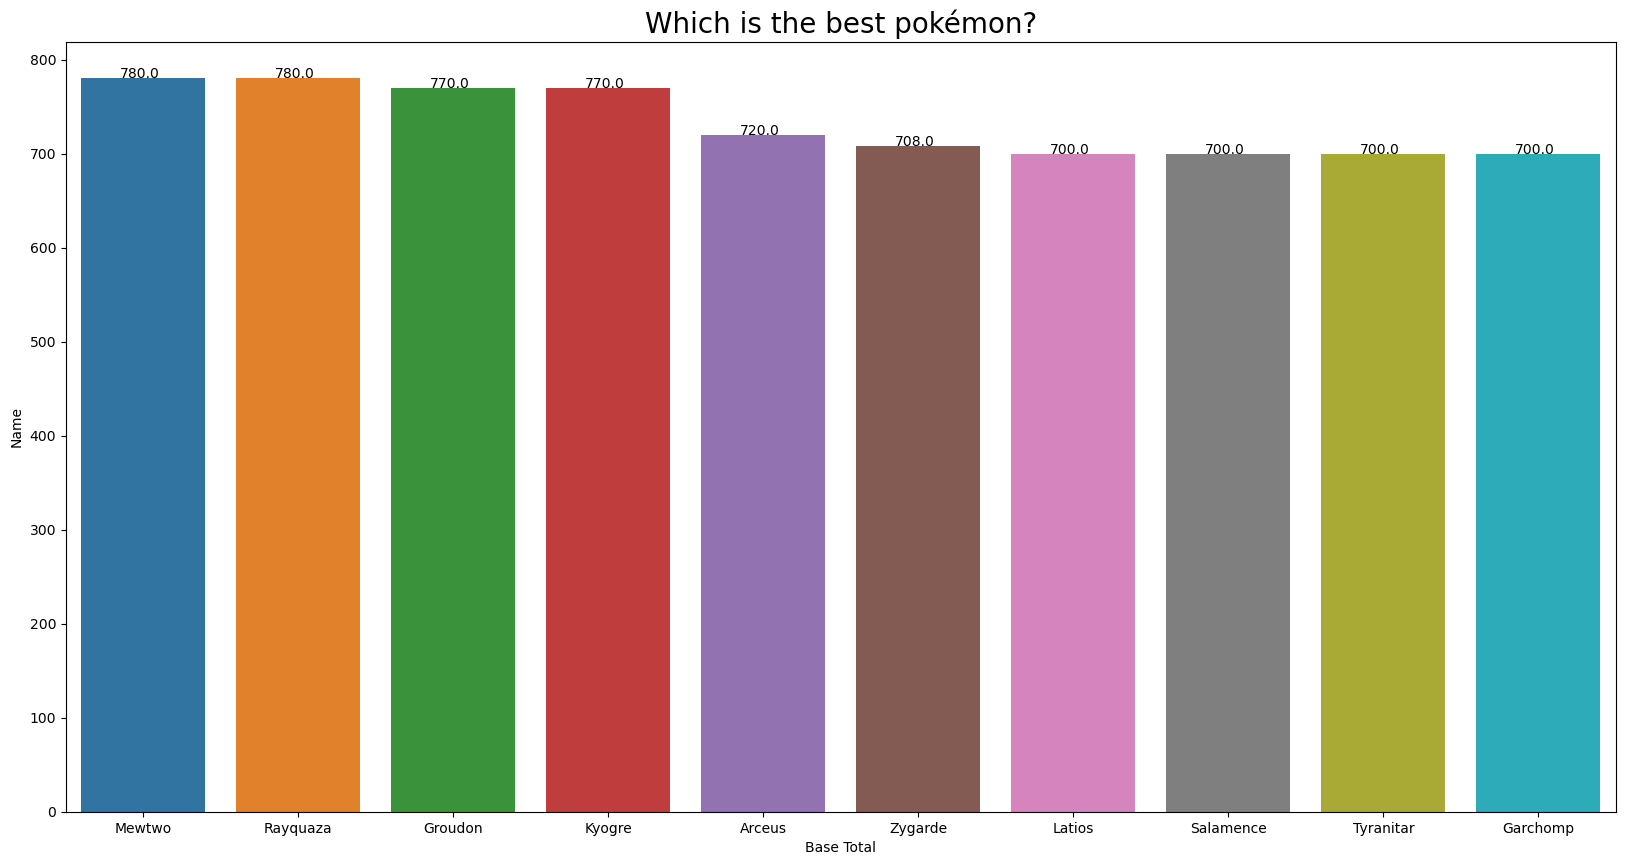

In [11]:
top10_pokemon_base_total = data.sort_values(by="base_total", ascending=False).reset_index()[:10]
plt.figure(figsize=(20,10))
ax = sns.barplot(x=top10_pokemon_base_total["name"], y=top10_pokemon_base_total["base_total"], orient='v')
ax.set_title("Which is the best pokémon?", size=20)
ax.set(xlabel="Base Total", ylabel="Name")
for p in ax.patches:
    ax.annotate('{:.1f}'.format( p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

# Anshul Singla
# CSE-1
# 20051562